# Tabular data manipulation

Penyusun: Tim Teknis Direktorat Meteorologi Maritim

Kontak: suwignyo.prasetyo@bmkg.go.id

---

### Kompetensi 
- Mampu membaca, membersihkan, dan memanipulasi data meteorologi maritim.

### Indikator keberhasilan
1. Peserta dapat membaca data dari file CSV, Excel, atau format tabular lainnya menggunakan Pandas.
2. Peserta dapat membersihkan data (handling missing value dan filtering) dan memanipulasi data tabular (sorting, grouping, dan agregasi).
---

## Membaca dan membersihkan data

Proses analisis data sepenuhnya disesuaikan dengan tujuan dan sifat dari data yang akan di analisis. Dalam praktik ini, kita akan memproses data waterlevel dari pengukuran MAWS Tanjung Priok. Data sampel tersedia dalam rentang waktu Agustus - September 2021, dengan resolusi temporal 10 menit.

> Tujuan: kita akan membuat rata-rata jam berdasarkan hari untuk mendapatkan pola harian. Output akhir adalah rata-rata data waterlevel dalam satu hari (jam 00 - 23).

> Disclaimer: Tujuan dari pengolahan ini disesuaikan untuk fokus pada bagaimana menghandel sampel data tabular meteorologi maritim khususnya menggunakan pandas, bukan untuk menganalisisnya secara ilmiah.

In [1]:
# load module & data
import pandas as pd

file1 = "../data/aws_priok_202108.csv"
file2 = "../data/aws_priok_202109.xlsx"
df1 = pd.read_csv(file1)
df2 = pd.read_excel(file2)

In [2]:
# cek data sekilas menggunakan method .head()
display(df1.head(3)) # menampilkan 3 baris
display(df2.head(3))

,Unnamed: 0,time,windspeed,winddir,temp,rh,pressure,rain,solrad,netrad,watertemp,waterlevel,ta_min,ta_max,pancilevel,pancitemp,Year,Month
0,0,2021-08-18 16:38:00,1.2,142.0,27.7,72.1,1010.7,0.0,0.0,0.0,30.6,1.952,0.0,0.0,0.0,0.0,2021,8
1,1,2021-08-30 17:04:00,0.5,135.0,28.8,76.3,1010.4,0.0,0.0,0.0,30.8,1.724,0.0,0.0,0.0,0.0,2021,8
2,2,2021-08-19 05:05:00,4.6,321.0,29.8,67.3,1009.4,0.0,388.8,0.0,30.4,1.814,0.0,0.0,0.0,0.0,2021,8


,Unnamed: 0,time,windspeed,winddir,temp,rh,pressure,rain,solrad,netrad,watertemp,waterlevel,ta_min,ta_max,pancilevel,pancitemp,Year,Month
0,0,2021-09-07 03:33:00,0.4,314,27.6,83.3,1012.9,1.2,568.4,0,30.5,1.721,0,0,0,0,2021,9
1,1,2021-09-23 12:47:00,2.3,81,29.5,70.7,1010.4,0.0,0.0,0,31.2,1.795,0,0,0,0,2021,9
2,2,2021-09-27 10:09:00,5.3,23,29.8,78.6,1006.5,0.0,72.8,0,31.5,1.795,0,0,0,0,2021,9


In [3]:
# seleksi & gabungkan data
cols = ['time','waterlevel']
df = pd.concat([df1[cols], df2[cols]])
df

,time,waterlevel
0,2021-08-18 16:38:00,1.952
1,2021-08-30 17:04:00,1.724
2,2021-08-19 05:05:00,1.814
3,2021-08-09 06:23:00,1.762
4,2021-08-01 22:27:00,1.535
...,...,...
39340,2021-09-05 05:43:00,1.862
39341,2021-09-12 18:23:00,1.538
39342,2021-09-21 14:22:00,2.007
39343,2021-09-06 13:16:00,2.156


time          0
waterlevel    0
dtype: int64

time           object
waterlevel    float64
dtype: object

,count,mean,std,min,25%,50%,75%,max
waterlevel,75765.0,1.854415,0.207846,0.438,1.724,1.802,2.047,4.38


<Axes: >

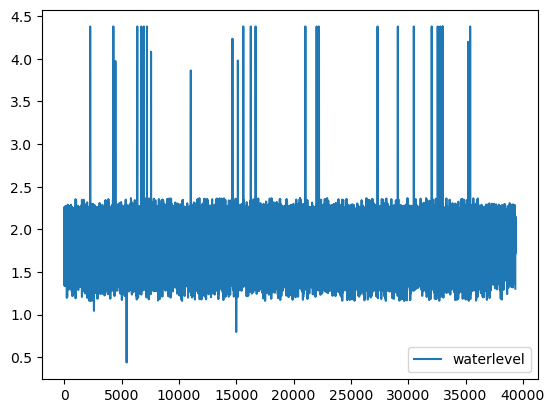

In [4]:
# Check nan values
display(df.isna().sum())
print(30*"=")

# check data types
display(df.dtypes)
print(30*"=")

# check stats
display(df.describe().T)
print(30*"=")

# quick plot
df.plot()

<!-- <div align='center'>***</div> -->
---


| Point penting | Tindak anjut | Metode |
| :- | :- | - |
| Tipe data waktu bukan datetime | ubah ke datetime | pandas to_datetime | 
| Urutan data acak | urutkan sesuai waktu | pandas sort_values |
| Terdapat spikes | eliminasi | pandas filtering |

---

In [5]:
# TO DATETIME
df['time'] = pd.to_datetime(df['time'])

# SORTING
df = df.sort_values(by='time')
df = df.set_index('time', drop=True)

# FILTERING: eliminasi spikes jika >99% dan <1%
q99 = df['waterlevel'].quantile(.99)
q01 = df['waterlevel'].quantile(.01)
df_filtered = df[(df['waterlevel'] > q01) & (df['waterlevel'] < q99)]
df_filtered

,waterlevel
time,
2021-08-01 03:00:00,1.723
2021-08-01 03:01:00,1.722
2021-08-01 03:02:00,1.724
2021-08-01 03:03:00,1.726
2021-08-01 03:04:00,1.725
...,...
2021-09-30 23:54:00,1.795
2021-09-30 23:55:00,1.795
2021-09-30 23:56:00,1.795


<Axes: xlabel='time'>

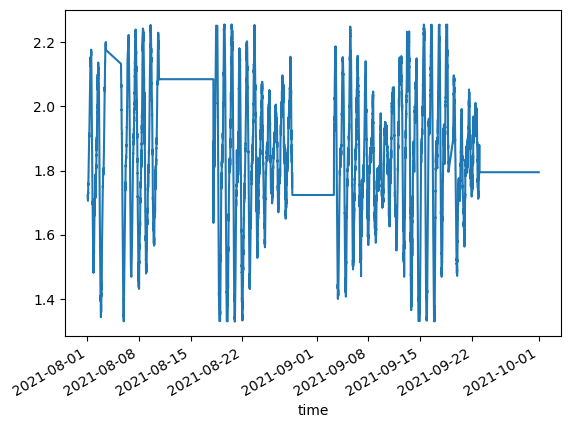

In [6]:
# QUICK PLOT
df_filtered['waterlevel'].plot()

## Memanipulasi data

---
Berdasarkan proses sebelumnya, terdapat tiga point penting.

| Point penting | Tindak anjut | Metode |
| :- | :- | - |
| Tidak terdapat nan values, namun nilai stagnan pada periode waktu tertentu | replace ke nan dan eliminasi | pandas filtering & apply method| 
| Resolusi temporal per 10 menit | ambil snapshoot tiap jam | pandas filtering |
| Resolusi temporal per jam | ambil rata-rata dalam periode keseluruhan | pandas groupby and agregation by mean |

---

In [7]:
# FILTERING NILAI STAGNAN

def remove_stagnan(val1, val2):
    diff = abs(val1-val2)
    if diff == 0.0:
        return 1
    else:
        return 0

df_filtered['waterlevellag1'] = df_filtered['waterlevel'].shift(periods=1)
df_filtered['to_remove'] = df_filtered.apply(lambda row: remove_stagnan(row['waterlevel'], row['waterlevellag1']), axis=1)
df_filtered

/tmp/ipykernel_1425217/835470890.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['waterlevellag1'] = df_filtered['waterlevel'].shift(periods=1)


/tmp/ipykernel_1425217/835470890.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['to_remove'] = df_filtered.apply(lambda row: remove_stagnan(row['waterlevel'], row['waterlevellag1']), axis=1)


,waterlevel,waterlevellag1,to_remove
time,,,
2021-08-01 03:00:00,1.723,NaN,0
2021-08-01 03:01:00,1.722,1.723,0
2021-08-01 03:02:00,1.724,1.722,0
2021-08-01 03:03:00,1.726,1.724,0
2021-08-01 03:04:00,1.725,1.726,0
...,...,...,...
2021-09-30 23:54:00,1.795,1.795,1
2021-09-30 23:55:00,1.795,1.795,1
2021-09-30 23:56:00,1.795,1.795,1


In [8]:
# FILTER
df_filtered_new = df_filtered[['waterlevel']][df_filtered['to_remove'] != 1]
# QUICK PLOT
df_filtered_new.describe().T

,count,mean,std,min,25%,50%,75%,max
waterlevel,39709.0,1.842266,0.208091,1.33,1.708,1.847,1.993,2.255


BEFORE


<Axes: >

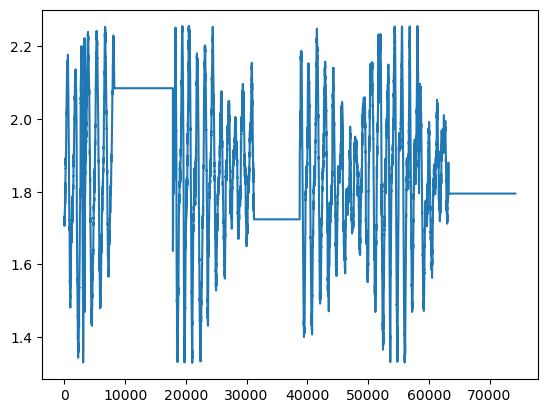

In [9]:
# QUICK PLOT
print("BEFORE")
display(df_filtered.reset_index(drop=True)['waterlevel'].plot())

AFTER


<Axes: >

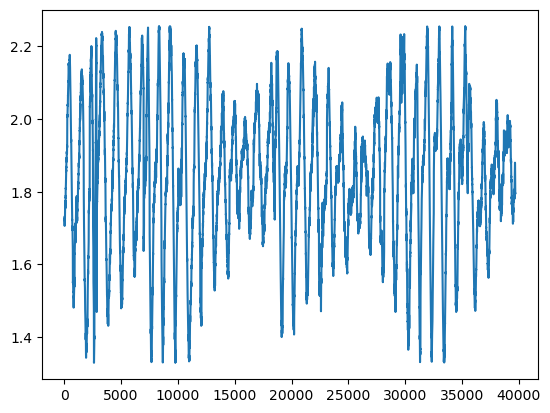

In [10]:
print("AFTER")
display(df_filtered_new.reset_index(drop=True)['waterlevel'].plot())

<Axes: >

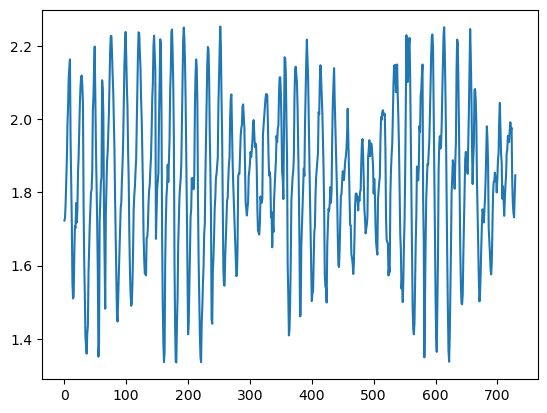

In [11]:
# SNAPSHOOT PER 1 JAM
df_1jam = df_filtered_new[df_filtered_new.index.minute == 0]
display(df_1jam.reset_index(drop=True)['waterlevel'].plot())

In [12]:
# RATA-RATA KESELURUHAN DATA
df_1jam_grouped = df_1jam.groupby(df_1jam.index.hour)
df_1jam_grouped

In [13]:
# CEK ISI DARI df_1jam_grouped
for key, val in df_1jam_grouped:
    print("Jam ke", key, val)
    print(50*"=")

Jam ke 0             waterlevel
time                  
2021-08-02       1.630
2021-08-03       1.437
2021-08-06       1.386
2021-08-08       1.447
2021-08-09       1.490
2021-08-10       1.578
2021-08-19       1.362
2021-08-20       1.335
2021-08-22       1.336
2021-08-23       1.441
2021-08-24       1.547
2021-08-25       1.571
2021-08-27       1.775
2021-08-28       1.779
2021-09-04       1.501
2021-09-05       1.465
2021-09-06       1.529
2021-09-07       1.499
2021-09-08       1.596
2021-09-09       1.577
2021-09-11       1.806
2021-09-12       1.859
2021-09-13       1.861
2021-09-14       1.739
2021-09-15       1.518
2021-09-16       1.621
2021-09-17       1.525
2021-09-18       1.628
2021-09-20       1.521
2021-09-21       1.611
2021-09-22       1.736
Jam ke 1                      waterlevel
time                           
2021-08-02 01:00:00       1.708
2021-08-03 01:00:00       1.581
2021-08-09 01:00:00       1.497
2021-08-10 01:00:00       1.577
2021-08-20 01:00:00       1.446

,waterlevel
time,
0,1.571161
1,1.643440
2,1.690821
3,1.765226
4,1.798323
5,1.844970
6,1.860250
7,1.890414
8,1.895290


<Axes: xlabel='time'>

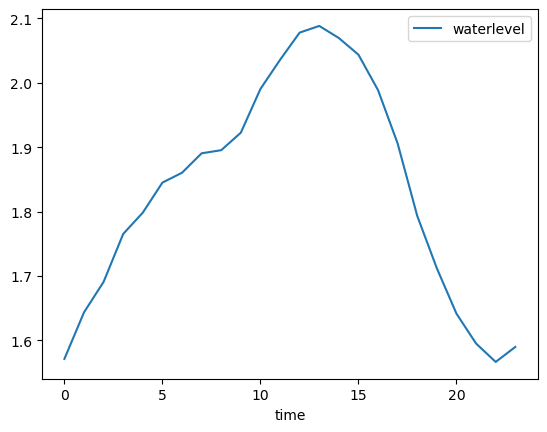

In [14]:
df_1jam_mean = df_1jam_grouped.mean()

display(df_1jam_mean)
display(df_1jam_mean.plot())